# 18.085 Final Project

## Nicholas Belsten & Hannah Tomio

## Start with Validation

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
iris=pd.read_csv('validation_data/IRIS.csv')

In [203]:
# Separating the independent variables from dependent variables
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.001)

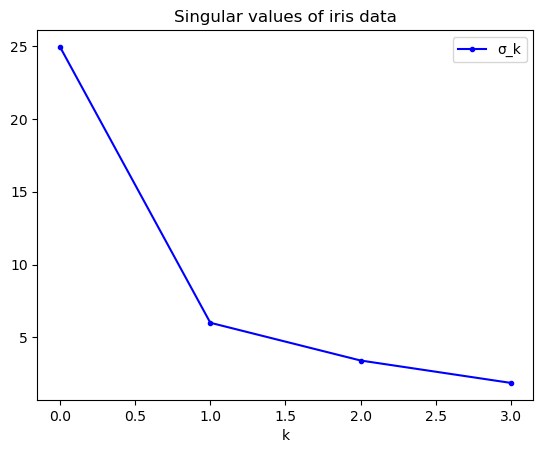

In [204]:
X = np.array(x_train).T

means = np.mean(X, axis=1)  # subtract means from X

A = X - np.expand_dims(means, axis=1)  # subtract means from X

U, sigma, V = np.linalg.svd(A, full_matrices=False)

plt.plot(sigma, "b.-")
plt.title("Singular values of iris data")
plt.xlabel("k")
plt.legend(["σ_k"])
plt.show()

In [205]:
def find_keys_by_value(dictionary, value):
    keys = []
    for key, val in dictionary.items():
        if val == value:
            keys.append(key)
    return keys

In [206]:
virginica_keys = find_keys_by_value(y_train, 'Iris-virginica')
versicolor_keys = find_keys_by_value(y_train, 'Iris-versicolor')
setosa_keys = find_keys_by_value(y_train, 'Iris-setosa')

In [207]:
virginica_indices = []
versicolor_indices = []
setosa_indices = []
i=0
for key in y_train.keys():
    if y_train[key] == 'Iris-virginica':
        virginica_indices.append(i)
    elif y_train[key] == 'Iris-versicolor':
        versicolor_indices.append(i)
    elif y_train[key] == 'Iris-setosa':
        setosa_indices.append(i)
    i += 1       
        

In [208]:
c1 = U[:, 0].T @ A
c2 = U[:, 1].T @ A

c = U.T @ A

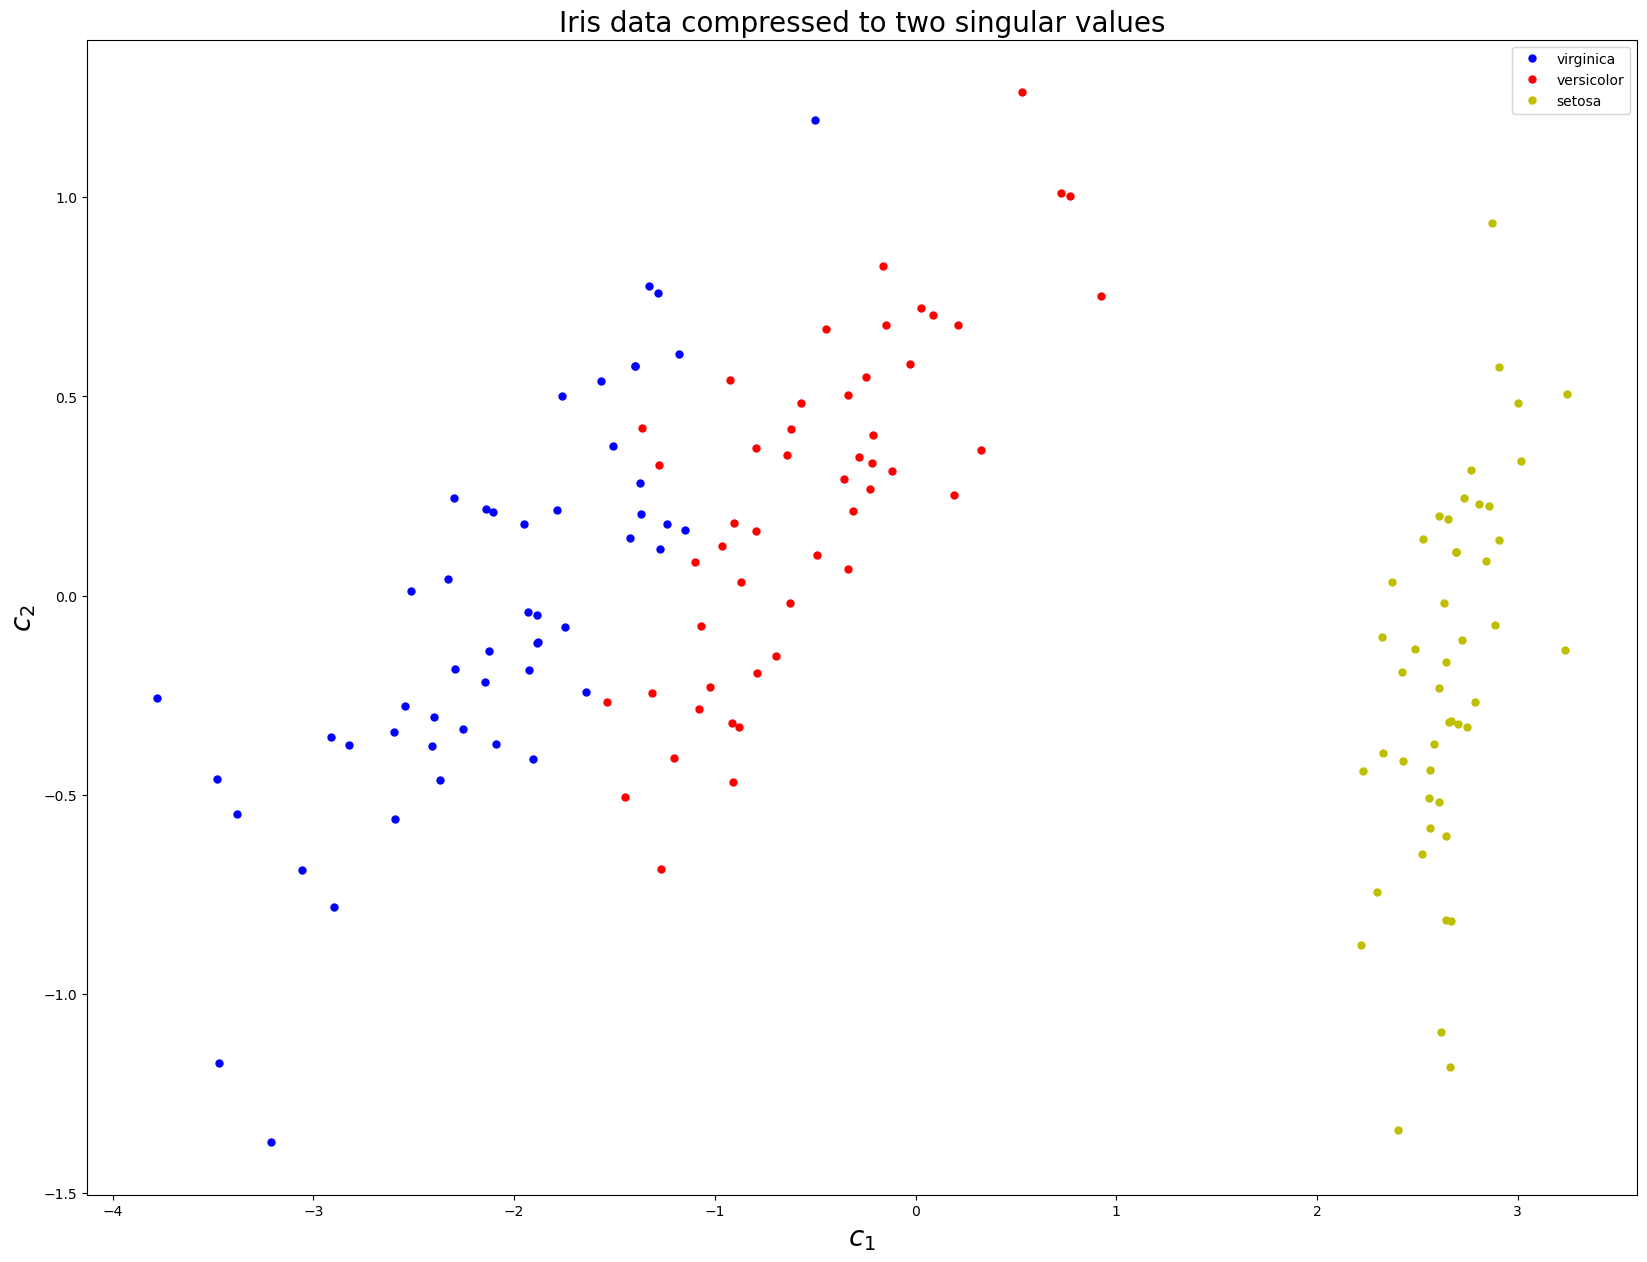

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sv1 = 0
sv2 = 1

plt.plot(c[sv1, :][virginica_indices], c[sv2, :][virginica_indices], "b.", markersize=10, label="virginica")
plt.plot(c[sv1, :][versicolor_indices], c[sv2, :][versicolor_indices], "r.", markersize=10, label="versicolor")
plt.plot(c[sv1, :][setosa_indices], c[sv2, :][setosa_indices], "y.", markersize=10, label="setosa")


# plt.text(c1, c2, [str(i) for i in range(1, len(c1)+1)], fontsize=12)
plt.title("Iris data compressed to two singular values", fontsize=20)
plt.xlabel("$c_1$", fontsize=20)
plt.ylabel("$c_2$", fontsize=20)
plt.legend()
plt.show()

In [213]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2) #Back to 0.2 test

In [214]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)
pred=model.predict(x_test)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [215]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


In [221]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train,model.predict(x_train)))

[[39  0  0]
 [ 0 37  2]
 [ 0  2 40]]


#### Neural Net

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50),learning_rate = 'adaptive', learning_rate_init=0.005, max_iter=300)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.9833333333333333


In [61]:
# Predict the labels for the test set
y_pred = mlp.predict(x_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9666666666666667


In [72]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0  8  1]
 [ 0  0  7]]


## Start Experiment on QuikSCAT Data

In [185]:
import pandas as pd
import numpy as np
import sklearn

# Load the data
fault_data = pd.read_csv("data/fault_quickscat.csv")
fault_data = fault_data.iloc[:-5, 1:].values.T  # Remove timestamps and transpose

normal_data = pd.read_csv("data/normal_quickscat.csv")
normal_data = normal_data.iloc[:-5, 1:].values.T  # Remove timestamps and transpose

# Each row is a parameter
# Each column is a timestamp

In [186]:
from sklearn import preprocessing

In [187]:
# Put it all in one big matrix
all_data = np.concatenate((normal_data, fault_data), axis=1)

normal_indices = np.arange(0, normal_data.shape[1])
fault_indices = np.arange(normal_data.shape[1], normal_data.shape[1]+fault_data.shape[1])

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(all_data)
scaled_data = scaler.transform(all_data)

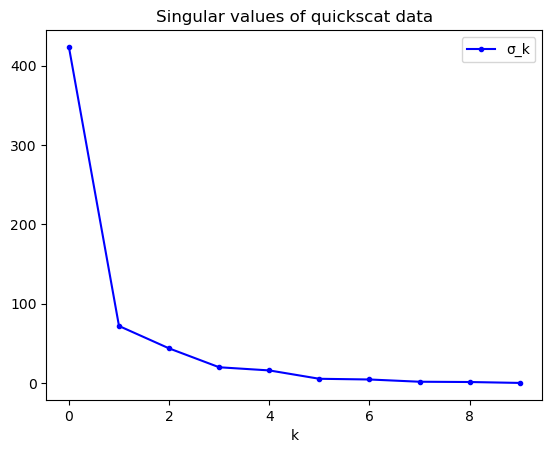

In [188]:
import matplotlib.pyplot as plt

X = scaled_data.astype(np.float64)

means = np.mean(X, axis=1)  # subtract means from X

A = X - np.expand_dims(means, axis=1)  # subtract means from X

U, sigma, V = np.linalg.svd(A, full_matrices=False)

plt.plot(sigma, "b.-")
plt.title("Singular values of quickscat data")
plt.xlabel("k")
plt.legend(["σ_k"])
plt.show()


In [189]:
c1 = U[:, 0].T @ A
c2 = U[:, 1].T @ A

c = U.T @ A

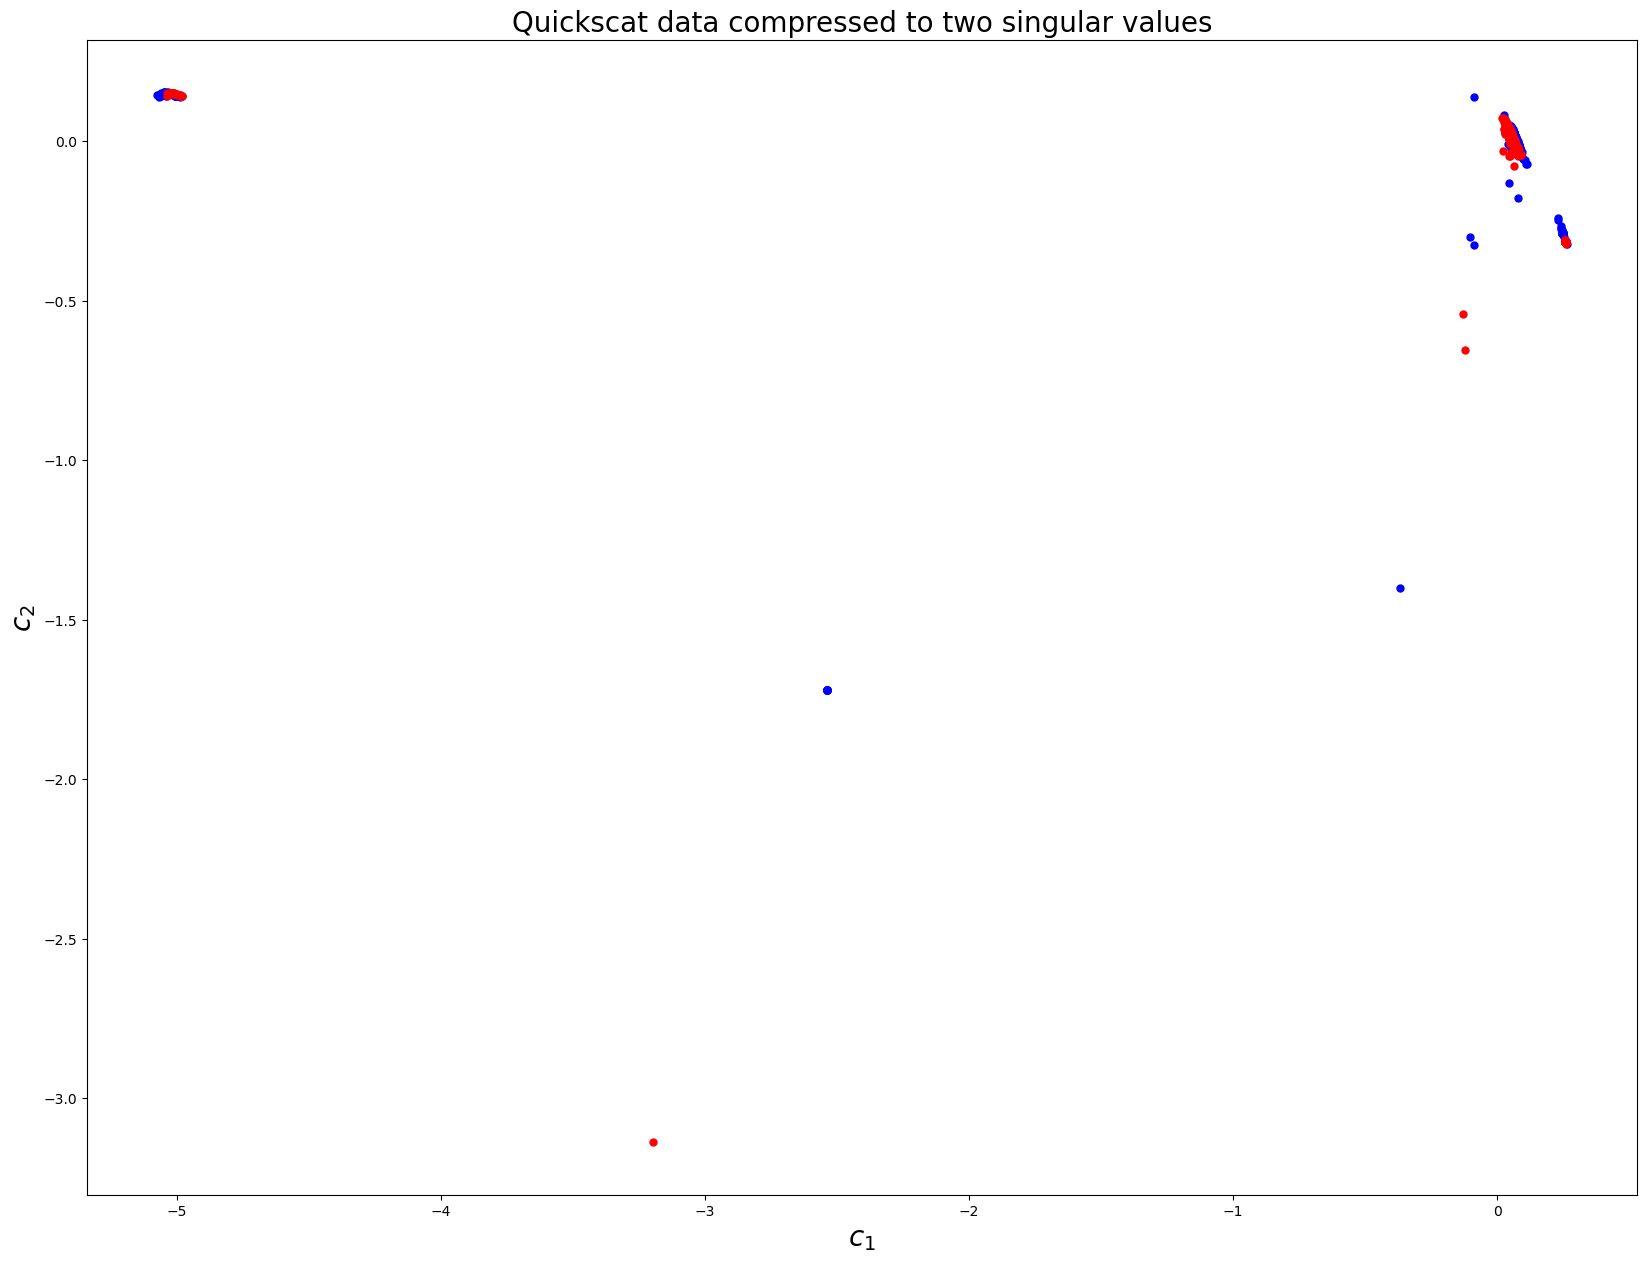

In [7]:
plt.figure(figsize=(20, 15))
plt.plot(c1[normal_indices][::100], c2[normal_indices][::100], "b.", markersize=10)
plt.plot(c1[fault_indices][::20], c2[fault_indices][::20], "r.", markersize=10)

# plt.text(c1, c2, [str(i) for i in range(1, len(c1)+1)], fontsize=12)
plt.title("Quickscat data compressed to two singular values", fontsize=20)
plt.xlabel("$c_1$", fontsize=20)
plt.ylabel("$c_2$", fontsize=20)
plt.show()

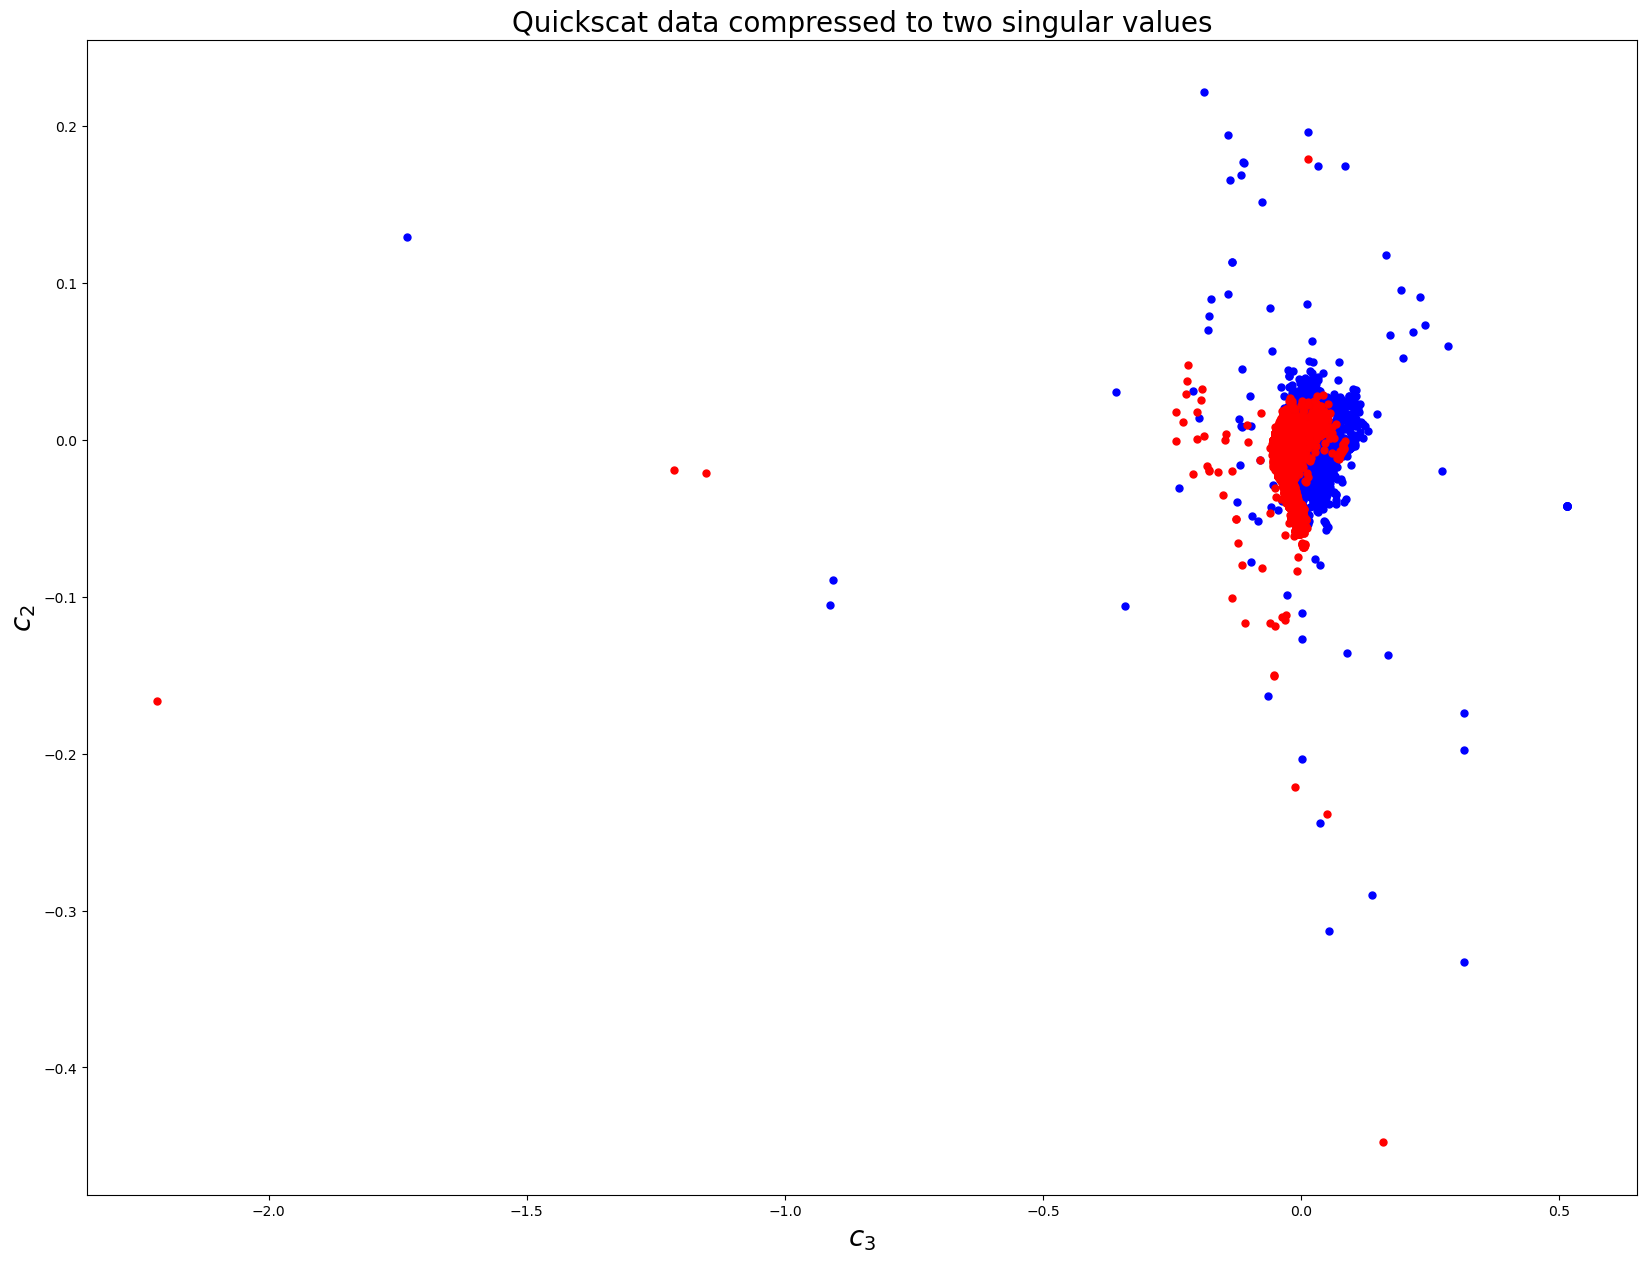

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sv1 = 2
sv2 = 3

plt.plot(c[sv1, :][normal_indices][::100], c[sv2, :][normal_indices][::100], "b.", markersize=10)
plt.plot(c[sv1, :][fault_indices][::20], c[sv2, :][fault_indices][::20], "r.", markersize=10)

# plt.text(c1, c2, [str(i) for i in range(1, len(c1)+1)], fontsize=12)
plt.title("Quickscat data compressed to two singular values", fontsize=20)
plt.xlabel("$c_3$", fontsize=20)
plt.ylabel("$c_2$", fontsize=20)
plt.show()


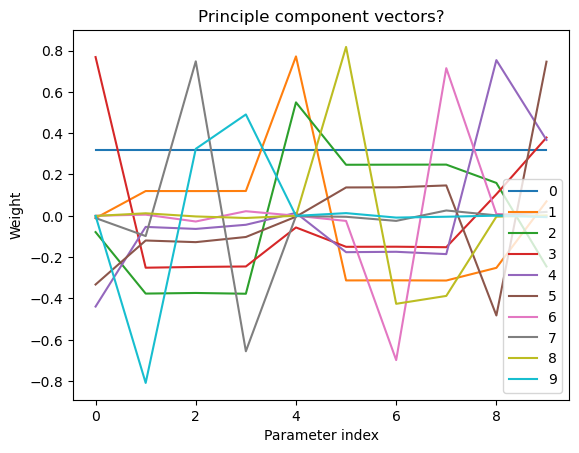

In [9]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.plot(range(10), U[:, i-1], label=str(i))

plt.title("Principle component vectors?")
plt.xlabel("Parameter index")
plt.ylabel("Weight")
plt.legend()
plt.show()


## Now use SVM

In [10]:
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [11]:
skip = 10

In [12]:
# Create labels for the data
fault_labels = np.ones(fault_data.shape[1])  # Assign label 1 for fault_data
normal_labels = np.zeros(normal_data.shape[1])  # Assign label 0 for normal_data

# Concatenate the data and labels
all_data = np.concatenate((fault_data, normal_data), axis=1)
all_labels = np.concatenate((fault_labels, normal_labels))

In [13]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(all_data)
scaled_data = scaler.transform(all_data)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data.T[::skip], all_labels[::skip], test_size=0.2, random_state=42)

In [15]:
# Create and train the SVM classifier
lin_svm = LinearSVC(verbose=True)
lin_svm.fit(X_train, y_train)

y_pred = lin_svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", train_accuracy)

print("Train F1:", accuracy_score(y_train, y_pred))

[LibLinear]Train Accuracy: 0.8270024772914947
Train F1: 0.8270024772914947


In [16]:
# Predict the labels for the test set
y_pred = lin_svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train F1:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8258607877136488
Train F1: 0.8258607877136488


In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9990,   25],
       [2084,   12]], dtype=int64)

In [18]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(all_data)
scaled_data = scaler.transform(all_data)

## Try to fix false pos / neg issue

In [19]:
orig_normal_data = normal_data
normal_data = normal_data[:,0:fault_data.shape[1]] #Make it so we have the same amount of non-fault and fault

In [20]:
skip = 10

In [21]:
# Create labels for the data
fault_labels = np.ones(fault_data.shape[1])  # Assign label 1 for fault_data
normal_labels = np.zeros(normal_data.shape[1])  # Assign label 0 for normal_data

# Concatenate the data and labels
all_data = np.concatenate((fault_data, normal_data), axis=1)
all_labels = np.concatenate((fault_labels, normal_labels))

In [22]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(all_data)
scaled_data = scaler.transform(all_data)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data.T[::skip], all_labels[::skip], test_size=0.2, random_state=42)

In [24]:
# Create and train the SVM classifier
lin_svm = LinearSVC(verbose=True)
lin_svm.fit(X_train, y_train)

y_pred = lin_svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", train_accuracy)

print("Train F1:", accuracy_score(y_train, y_pred))

[LibLinear]Train Accuracy: 0.8854478058113118
Train F1: 0.8854478058113118


In [25]:
# Predict the labels for the test set
y_pred = lin_svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train F1:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8866571018651362
Train F1: 0.8866571018651362


In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1762,  319],
       [ 155, 1946]], dtype=int64)

In [27]:
lin_svm.coef_

array([[ -3.73573245,   1.52291239,  -5.96742084,  10.00689099,
          3.42538191,   6.5957793 ,   7.04048629,   6.29884221,
        -16.03244414,  -9.15469566]])

In [35]:
import sklearn.inspection
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ValueError: n_features must be equal to 2. Got 10 instead.

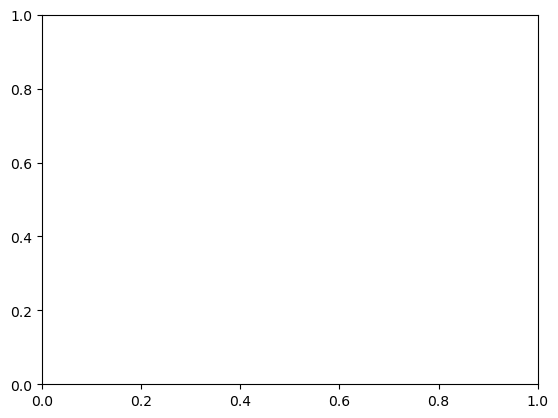

In [41]:
# Scale the features for better visualization
scaler = StandardScaler()
X = U[:,] @ X_train 

# Plot the decision boundary
fig, ax = plt.subplots()

DBD = DecisionBoundaryDisplay.from_estimator(lin_svm, X)

# Scatter plot the data points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Decision Boundary of Linear SVC')

plt.show()

## Non-linear SVM

### Polynomial

In [103]:
skip = 100

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data.T[::skip], all_labels[::skip], test_size=0.2, random_state=42)

In [108]:
# Create and train the SVM classifier
svm2 = SVC(verbose=True, kernel = 'poly', degree=5)
svm2.fit(X_train, y_train)

y_pred = svm2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", train_accuracy)

[LibSVM]Train Accuracy: 0.8311312964492156


In [109]:
# Predict the labels for the test set
y_pred = svm2.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8118811881188119


## Neural Network

In [113]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [160]:
skip = 5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data.T[::skip], all_labels[::skip], test_size=0.2, random_state=42)

In [161]:
# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50),learning_rate = 'adaptive', learning_rate_init=0.005, max_iter=300)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.9087530966143683


In [162]:
# Predict the labels for the test set
y_pred = mlp.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.90652739358408


## Try running on 1U CubeSat Data

In [173]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEl'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [174]:
nepalisat_1 = pd.read_csv("jara2022_data/nepalisat_9nov2020.csv")
nepalisat_2 = pd.read_csv("jara2022_data/nepalisat_25nov2020.csv")
nepalisat_3 = pd.read_csv("jara2022_data/nepalisat_10apr2021.csv")
nepalisat_data = {"nepalisat_1": nepalisat_1, "nepalisat_2": nepalisat_2, "nepalisat_3":nepalisat_3}

raavana_1 = pd.read_csv("jara2022_data/raavana_13feb2021.csv")
raavana_2 = pd.read_csv("jara2022_data/raavana_11mar2021.csv")
raavana_data = {"raavana_1": raavana_1, "raavana_2": raavana_2}

uguisu_1 = pd.read_csv("jara2022_data/uguisu_23oct2020.csv")
uguisu_2 = pd.read_csv("jara2022_data/uguisu_13feb2021.csv")
uguisu_3 = pd.read_csv("jara2022_data/uguisu_10apr2021.csv")
uguisu_data = {"uguisu_1": uguisu_1, "uguisu_2": uguisu_2, "uguisu_3":uguisu_3}

tsuru_1 = pd.read_csv("jara2022_data/tsuru_28mar2021.csv")
tsuru_2 = pd.read_csv("jara2022_data/tsuru_31mar2021.csv")
tsuru_3 = pd.read_csv("jara2022_data/tsuru_20apr2021.csv")
tsuru_4 = pd.read_csv("jara2022_data/tsuru_27apr2021.csv")
tsuru_5 = pd.read_csv("jara2022_data/tsuru_6may2021.csv")
tsuru_6 = pd.read_csv("jara2022_data/tsuru_13may2021.csv")
tsuru_7 = pd.read_csv("jara2022_data/tsuru_21may2021.csv")
tsuru_8 = pd.read_csv("jara2022_data/tsuru_28may2021.csv")
tsuru_9 = pd.read_csv("jara2022_data/tsuru_01jun2021.csv")
tsuru_10 = pd.read_csv("jara2022_data/tsuru_11jun2021.csv")
tsuru_data = {"tsuru_1": tsuru_1, "tsuru_2": tsuru_2, "tsuru_3":tsuru_3, "tsuru_4": tsuru_4,
             "tsuru_5": tsuru_5,"tsuru_6": tsuru_6,"tsuru_7": tsuru_7,"tsuru_8": tsuru_8,
             "tsuru_9": tsuru_9,"tsuru_10": tsuru_10}

all_data = dict(nepalisat_data, **raavana_data, **uguisu_data, **tsuru_data)

sats = {"nepalisat":nepalisat_data, "raavana":raavana_data, "uguisu":uguisu_data, "tsuru":tsuru_data}

In [175]:
#Rename columns (parantheses cause issues)
columns = {"Tpx (°C)" : "Tpx_C",
                   "Tpy (°C)" : "Tpy_C",
                   "Tpz (°C)" : "Tpz_C",
                   "Tmx (°C)" : "Tmx_C",
                   "Tmz (°C)" : "Tmz_C",
                   "Vpx (mV)" : "Vpx_mV",
                   "Vpy (mV)" : "Vpy_mV",
                   "Vpz (mV)" : "Vpz_mV",
                   "Vmx (mV)" : "Vmx_mV",
                   "Vmz (mV)" : "Vmz_mV",
                   "Ipx (mA)" : "Ipx_mA",
                   "Ipy (mA)" : "Ipy_mA",
                   "Ipz (mA)" : "Ipz_mA",
                   "Imx (mA)" : "Imx_mA",
                   "Imz (mA)" : "Imz_mA",
                   "Vbat (V)" : "Vbat_V",
                   "Ibatt(mA)" : "Ibat_mA",
                   "Tbatt (℃)" : "Tbat_C"}
for varname, df in all_data.items():
    df = df.rename(columns=columns)
    all_data[varname] = df #Rename in all_data
    sats[varname.split('_')[0]][varname] = df #Rename in [sat]_data
    locals()[varname] = df #Rename in local variables

In [176]:
physical_columns = ['Tpy_C', 'Tpx_C', 
       'Tmz_C', 'Tmx_C', 'Tpz_C', 'Vpy_mV', 'Vpx_mV', 'Vmz_mV', 
       'Vmx_mV', 'Vpz_mV', 'Ipy_mA', 'Ipx_mA', 'Imz_mA', 'Imx_mA', 'Ipz_mA', 'Vbat_V', 'Ibat_mA',
       'Tbat_C']

#Case study: Complete success
df = all_data["nepalisat_2"]
success = np.array(df[physical_columns]).T

#Case study: Complete failure
df = all_data["raavana_2"]
failure = np.array(df[physical_columns]).T

#Case study: Partial failure
df = all_data["uguisu_2"]
partial = np.array(df[physical_columns]).T

#### Try to visualize

In [177]:
# Put it all in one big matrix
all_data = np.concatenate((failure, partial, success), axis=1)

# Create labels for the data
failure_labels = np.ones(failure.shape[1])*2  # Assign label 2 for fault_data
partial_labels = np.ones(partial.shape[1])  # Assign label 1 for fault_data
success_labels = np.zeros(success.shape[1])  # Assign label 0 for normal_data

# Concatenate the data and labels
all_data = np.concatenate((failure, partial, success), axis=1)
all_labels = np.concatenate((failure_labels, partial_labels, success_labels))

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(all_data)
scaled_data = scaler.transform(all_data)

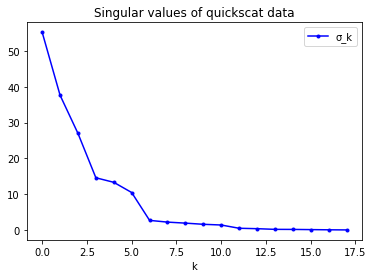

In [178]:
X = scaled_data.astype(np.float64)

means = np.mean(X, axis=1)  # subtract means from X

A = X - np.expand_dims(means, axis=1)  # subtract means from X

U, sigma, V = np.linalg.svd(A, full_matrices=False)

plt.plot(sigma, "b.-")
plt.title("Singular values of quickscat data")
plt.xlabel("k")
plt.legend(["σ_k"])
plt.show()

In [179]:
c1 = U[:, 0].T @ A
c2 = U[:, 1].T @ A

c = U.T @ A

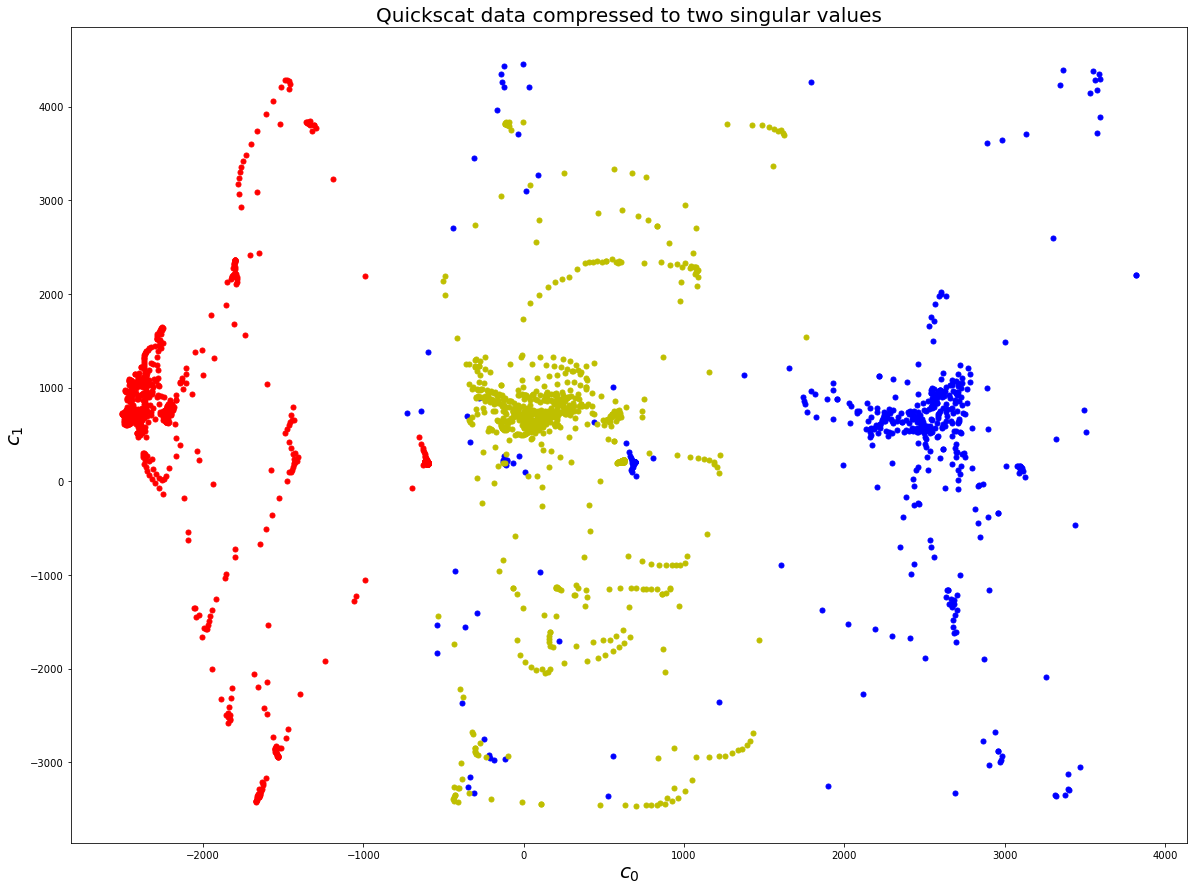

In [197]:
plt.figure(figsize=(20, 15))
ax1 = 0
ax2 = 1
plt.plot(U[:, ax1].T @ success, U[:, ax2].T @ success, "b.", markersize=10, label = "Success")
plt.plot(U[:, ax1].T @ failure, U[:, ax2].T @ failure, "r.", markersize=10, label = "Failure")
plt.plot(U[:, ax1].T @ partial, U[:, ax2].T @ partial, "y.", markersize=10, label = "Partial")

# plt.text(c1, c2, [str(i) for i in range(1, len(c1)+1)], fontsize=12)
plt.title("Quickscat data compressed to two singular values", fontsize=20)
plt.xlabel("$c_0$", fontsize=20)
plt.ylabel("$c_1$", fontsize=20)
plt.show()

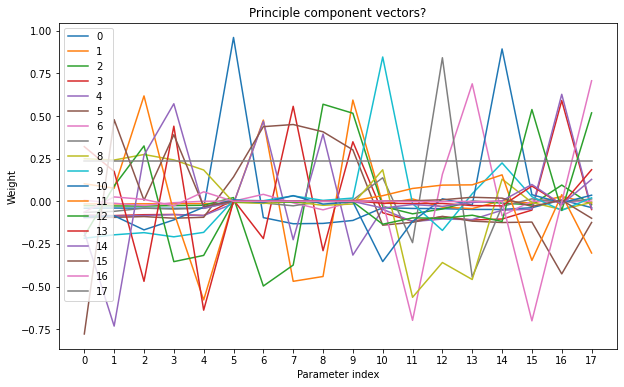

In [198]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

for i in range(18):
    plt.plot(range(18), U[:, i], label=str(i))

plt.title("Principle component vectors?")
plt.xlabel("Parameter index")
plt.ylabel("Weight")
new_list = range(0,18)
plt.xticks(new_list)
plt.legend()
plt.show()

In [194]:
U[:, 0]

array([-0.04098781, -0.03982307, -0.04071832, -0.04154108, -0.0400899 ,
        0.96072462, -0.09592103, -0.13186946, -0.12991936, -0.11261429,
       -0.03788156, -0.04218427, -0.04332909, -0.04796704, -0.04819647,
       -0.03782659,  0.00752084, -0.03737611])

In [200]:
physical_columns[5]

'Vpy_mV'

In [201]:
physical_columns[14]

'Ipz_mA'

Text(0, 0.5, 'Ipz_mA')

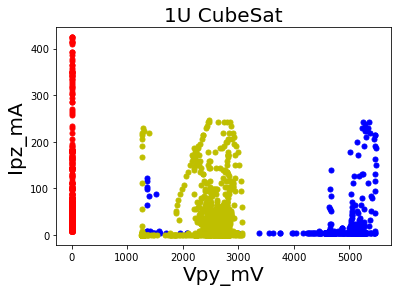

In [204]:
plt.plot(success[5,:], success[14,:], "b.", markersize=10, label = "Success")
plt.plot(failure[5,:], failure[14,:], "r.", markersize=10, label = "Failure")
plt.plot(partial[5,:], partial[14,:], "y.", markersize=10, label = "Partial")

# plt.text(c1, c2, [str(i) for i in range(1, len(c1)+1)], fontsize=12)
plt.title("1U CubeSat", fontsize=20)
plt.xlabel(physical_columns[5], fontsize=20)
plt.ylabel(physical_columns[14], fontsize=20)

### SVC
Here we will train a SVM on the partial and success data, and then see how accurately it characterizes the 

In [146]:
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [147]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data.T, all_labels, test_size=0.2, random_state=42)

In [148]:
# Create a support vector classifier
classifier = SVC(decision_function_shape='ovo')

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test)

In [160]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Test F1:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

Test Accuracy: 0.868421052631579
Test F1: 0.868421052631579


array([[168,   8,   0],
       [ 72, 135,   0],
       [  0,   0, 225]], dtype=int64)

#### Neural Net

In [110]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [111]:
# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50),learning_rate = 'adaptive', learning_rate_init=0.005, max_iter=300)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", train_accuracy)

# Predict the labels for the test set
y_pred = mlp.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Train Accuracy: 0.9827302631578947
Test Accuracy: 0.9654605263157895


### Generalization Across Error Types?
Can we train on just one type of fault and accurately predict another?
AKA how does this generalize across fault types?

In [137]:
X_train, X_test, y_train, y_test = train_test_split(np.concatenate((success,partial),axis=1).T, np.concatenate((success_labels,partial_labels)), test_size=0.2, random_state=42)

X_train = np.concatenate((success,partial),axis=1).T
X_test = np.concatenate((success,failure),axis=1).T

y_train = np.concatenate((success_labels,partial_labels))
y_test = np.concatenate((success_labels,failure_labels/2))

#Use the train test split just to shuffle
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.001, random_state=42)
_, X_test, _, y_test = train_test_split(X_test, y_test, test_size=0.999, random_state=42)


In [138]:
# Create a support vector classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

                        
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train F1:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

Test Accuracy: 0.7708014293006636
Train F1: 0.7708014293006636


array([[824,  56],
       [393, 686]], dtype=int64)

#### Neural Net

In [143]:
# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50),learning_rate = 'adaptive', learning_rate_init=0.005, max_iter=300)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", train_accuracy)

# Predict the labels for the test set
y_pred = mlp.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Train Accuracy: 0.9744637385086823
Test Accuracy: 0.9678407350689127
